# COVID-19 Exploratory Data Analysis 

Analysis data COVID-19 di
    1. Dunia
    2. Indonesia
    3. Jakarta

Sumber data COVID-19

    1. Dunia : Johns Hopkins University
       https://github.com/CSSEGISandData
    2. Indonesia : Badan Nasional Penanggulangan Bencana (BNPB)
       https://www.bnpb.go.id/
    3. Jakarta : Riwayat File Covid-19 DKI Jakarta
       https://riwayat-file-covid-19-dki-jakarta-jakartagis.hub.arcgis.com/

### Import Library

In [1]:
import pandas as pd
import json
import requests

import matplotlib.pyplot as plt
from matplotlib import style
plt.rcParams['figure.figsize'] = 20,8
style.use('ggplot')
%matplotlib inline

import plotly
import plotly.express as px
import plotly.graph_objects as go
import plotly.offline as pyo
from plotly.offline import download_plotlyjs,init_notebook_mode, plot, iplot
plt.rcParams['figure.figsize'] = 20,8

import cufflinks as cf

import folium
pyo.init_notebook_mode(connected = True)
cf.go_offline()

import numpy as np
from random import randint

import pycountry

import os

## Analisis Data di Dunia

### Task 1 : Import Data From CSV

In [2]:
df_confirmed = pd.read_csv("./raw_covid_world/time_series_covid19_confirmed_global.csv")
df_deaths = pd.read_csv("./raw_covid_world/time_series_covid19_deaths_global.csv")
df_recovered = pd.read_csv("./raw_covid_world/time_series_covid19_recovered_global.csv")

In [3]:
df_confirmed

Province/State         Country/Region        Lat       Long  1/22/20  \
0              NaN            Afghanistan  33.000000  65.000000        0   
1              NaN                Albania  41.153300  20.168300        0   
2              NaN                Algeria  28.033900   1.659600        0   
3              NaN                Andorra  42.506300   1.521800        0   
4              NaN                 Angola -11.202700  17.873900        0   
..             ...                    ...        ...        ...      ...   
261            NaN  Sao Tome and Principe   0.186360   6.613081        0   
262            NaN                  Yemen  15.552727  48.516388        0   
263            NaN                Comoros -11.645500  43.333300        0   
264            NaN             Tajikistan  38.861034  71.276093        0   
265            NaN                Lesotho -29.609988  28.233608        0   

     1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  6/27/20  6/28/20  \
0          0        0        0        0        0  ...    30616    30967   
1          0        0        0        0        0  ...     2330     2402   
2          0        0        0        0        0  ...    12968    13273   
3          0        0        0        0        0  ...      855      855   
4          0        0        0        0        0  ...      259      267   
..       ...      ...      ...      ...      ...  ...      ...      ...   
261        0        0        0        0        0  ...      713      713   
262        0        0        0        0        0  ...     1103     1118   
263        0        0        0        0        0  ...      272      272   
264        0        0        0        0        0  ...     5799     5849   
265        0        0        0        0        0  ...       24       27   

     6/29/20  6/30/20  7/1/20  7/2/20  7/3/20  7/4/20  7/5/20  7/6/20  
0      31238    31517   31836   32022   32324   32672   32951   33190  
1       2466     2535    2580    2662    2752    2819    2893    2964  
2      13571    13907   14272   14657   15070   15500   15941   16404  
3        855      855     855     855     855     855     855     855  
4        276      284     291     315     328     346     346     346  
..       ...      ...     ...     ...     ...     ...     ...     ...  
261      713      714     715     717     719     719     720     721  
262     1128     1158    1190    1221    1240    1248    1265    1284  
263      272      303     303     303     309     309     311     311  
264     5900     5900    6005    6058    6058    6159    6213    6262  
265       27       27      35      35      35      35      79      91  

[266 rows x 171 columns]

### Task 2: Melt Data

In [4]:
df_confirmed = df_confirmed.melt(id_vars = ['Province/State','Country/Region','Lat','Long'],
                                 var_name = 'Time', value_name = 'Confirmed')
df_deaths = df_deaths.melt(id_vars = ['Province/State','Country/Region','Lat','Long'],
                           var_name = 'Time', value_name = 'Deaths')
df_recovered = df_recovered.melt(id_vars = ['Province/State','Country/Region','Lat','Long'],
                                 var_name = 'Time', value_name = 'Recovered')

In [5]:
df_confirmed

Province/State         Country/Region        Lat       Long     Time  \
0                NaN            Afghanistan  33.000000  65.000000  1/22/20   
1                NaN                Albania  41.153300  20.168300  1/22/20   
2                NaN                Algeria  28.033900   1.659600  1/22/20   
3                NaN                Andorra  42.506300   1.521800  1/22/20   
4                NaN                 Angola -11.202700  17.873900  1/22/20   
...              ...                    ...        ...        ...      ...   
44417            NaN  Sao Tome and Principe   0.186360   6.613081   7/6/20   
44418            NaN                  Yemen  15.552727  48.516388   7/6/20   
44419            NaN                Comoros -11.645500  43.333300   7/6/20   
44420            NaN             Tajikistan  38.861034  71.276093   7/6/20   
44421            NaN                Lesotho -29.609988  28.233608   7/6/20   

       Confirmed  
0              0  
1              0  
2              0  
3              0  
4              0  
...          ...  
44417        721  
44418       1284  
44419        311  
44420       6262  
44421         91  

[44422 rows x 6 columns]

### Task 3 : Merge Data

In [6]:
df_confirmed = df_confirmed.groupby(['Country/Region','Time'])['Confirmed'].sum()
df_confirmed = df_confirmed.to_frame().reset_index()

df_deaths = df_deaths.groupby(['Country/Region','Time'])['Deaths'].sum()
df_deaths = df_deaths.to_frame().reset_index()

df_recovered = df_recovered.groupby(['Country/Region','Time'])['Recovered'].sum()
df_recovered  = df_recovered .to_frame().reset_index()

In [7]:
df_confirmed = df_confirmed.merge(df_deaths, how = 'inner')

In [8]:
data = df_confirmed.merge(df_recovered, how = 'inner')

In [9]:
data

Country/Region     Time  Confirmed  Deaths  Recovered
0        Afghanistan  1/22/20          0       0          0
1        Afghanistan  1/23/20          0       0          0
2        Afghanistan  1/24/20          0       0          0
3        Afghanistan  1/25/20          0       0          0
4        Afghanistan  1/26/20          0       0          0
...              ...      ...        ...     ...        ...
31391       Zimbabwe   7/2/20        617       7        173
31392       Zimbabwe   7/3/20        625       7        176
31393       Zimbabwe   7/4/20        698       8        181
31394       Zimbabwe   7/5/20        716       8        181
31395       Zimbabwe   7/6/20        734       9        197

[31396 rows x 5 columns]

### Task 3 : Add Columns 'Aktiv Cases'

In [10]:
data['Aktiv Cases'] = data['Confirmed'] - data['Deaths'] - data['Recovered']

### Task 4 : To_datetime columns 'Time'

In [11]:
data['Time'] = pd.to_datetime(data['Time'])

### Task 5 : Visualisasi Trend Covid Global

In [12]:
dataGroupByTime = data.groupby('Time')[["Confirmed","Deaths","Recovered","Aktiv Cases"]].sum()

In [13]:
dataGroupByTime.iplot(kind = "bar", y = "Confirmed", title = "Tren Confirmasi Kasus Covid-19 Secara Global",
                      xTitle = "Waktu", yTitle = 'Jumlah Terkonfirmasi')

In [14]:
dataGroupByTime.iplot(kind = "bar", y = "Aktiv Cases", title = "Tren Kasus Aktif Covid-19 Global",
                      xTitle = "Waktu", yTitle = "Jumlah Kasus Aktif")

In [15]:
dataGroupByTime.iplot(kind = "bar", y = "Deaths", title = "Tren Kasus Kematian Akibat Covid-19 Global",
                      xTitle = "Waktu", yTitle = "Jumlah Kematian")

In [16]:
dataGroupByTime.iplot(kind = "bar", y = "Recovered", title = "Tren Kasus Sembuh dari Covid-19 Global",
                      xTitle = "Waktu", yTitle = "Jumlah Sembuh")

In [17]:
dataGroupByTime.iplot(title = "Trend Kasus COVID-19 Secara Global", xTitle = "Waktu", yTitle = "Jumlah")

### Task 6 : Jumlah kasus Covid Terbaru

In [18]:
least_recent_date = data['Time'].min()
recent_date = data['Time'].max()

In [19]:
last_day = data[data['Time'] == recent_date]

### Task 7 : Visualisasi Kasus Covid Di Dunia

In [20]:
fig = px.choropleth(last_day, locations=last_day['Country/Region'],
                    color=last_day['Confirmed'],locationmode='country names', 
                    hover_name=last_day['Country/Region'], 
                    color_continuous_scale=px.colors.sequential.Peach,
                    template ='plotly_dark')

fig.update_geos(fitbounds="locations", visible=False)
fig.update_layout(title_text="Kasus Terkonfirmasi COVID-19 Di Dunia")
fig.update_coloraxes(colorbar_title="Jumlah Konfirmasi")

fig.show()

In [21]:
fig = px.choropleth(last_day, locations=last_day['Country/Region'],
                    color=last_day['Aktiv Cases'],locationmode='country names', 
                    hover_name=last_day['Country/Region'], 
                    color_continuous_scale=px.colors.sequential.YlOrBr,
                    template ='plotly_dark')

fig.update_geos(fitbounds="locations", visible=False)
fig.update_layout(title_text="Kasus Aktiv COVID-19 Di Dunia")
fig.update_coloraxes(colorbar_title="Jumlah Kasus Aktiv")

fig.show()

In [22]:
fig = px.choropleth(last_day, locations=last_day['Country/Region'],
                    color=last_day['Deaths'],locationmode='country names', 
                    hover_name=last_day['Country/Region'], 
                    color_continuous_scale=px.colors.sequential.YlOrRd,
                    template='plotly_dark')
fig.update_geos(fitbounds="locations", visible=False)
fig.update_layout(title_text="Kasus Kematian COVID-19 Di Dunia")
fig.update_coloraxes(colorbar_title="Jumlah Kematian")

fig.show()

In [77]:
fig = px.choropleth(last_day, locations=last_day['Country/Region'],
                    color=last_day['Recovered'],locationmode='country names', 
                    hover_name=last_day['Country/Region'], 
                    color_continuous_scale=px.colors.sequential.YlOrBr,
                    template ='plotly_dark')

fig.update_geos(fitbounds="locations", visible=False)
fig.update_layout(title_text="Kasus Sembuh COVID-19 Di Dunia")
fig.update_coloraxes(colorbar_title="Jumlah Sembuh")

fig.show()

### Task 8 : Visualisasi Kasus Terkonfirmasi Covid Di Dunia (Animated)

In [24]:
fig = px.choropleth(df_confirmed, locations=df_confirmed['Country/Region'],
                    color=data['Confirmed'],locationmode='country names', 
                    hover_name=df_confirmed['Country/Region'], 
                    color_continuous_scale=px.colors.sequential.YlOrRd,
                    template='plotly_dark',
                    animation_frame= "Time")
fig.update_geos(fitbounds="locations", visible=False)
fig.update_layout(title_text="Kasus Terkonfirmasi COVID-19 Di Dunia")
fig.update_coloraxes(colorbar_title="Jumlah Konfirmasi")

fig.show()

## Analisis Data di Indonesia

### Task 1 : Import Data From API

In [79]:
api = "https://opendata.arcgis.com/datasets/0c0f4558f1e548b68a1c82112744bad3_0.geojson"

In [80]:
r = requests.get(api)
r

<Response [200]>

In [81]:
data = r.json()

In [82]:
df = pd.json_normalize(data,'features', sep = "_")

In [84]:
df.tail()

type  properties_FID  properties_Kode_Provi properties_Provinsi  \
30  Feature              31                     81              Maluku   
31  Feature              32                     82        Maluku Utara   
32  Feature              33                     94               Papua   
33  Feature              34                     91         Papua Barat   
34  Feature              35                      0           Indonesia   

    properties_Kasus_Posi  properties_Kasus_Semb  properties_Kasus_Meni  \
30                    804                    381                     17   
31                    953                    123                     32   
32                   2027                    928                     18   
33                    265                    184                      4   
34                      2                      0                      0   

   geometry_type                     geometry_coordinates  
30         Point         [129.360425, -3.126119342999971]  
31         Point  [128.01592944200002, 0.869337001000019]  
32         Point                [140.0000000000001, -5.0]  
33         Point  [132.9683417120001, -2.041723281999964]  
34         Point         [113.915865, -0.989818181999965]

### Task 2 : Drop Columns

In [30]:
df.drop(columns = ['type', 'properties_FID', 'geometry_type', 'properties_Kode_Provi'],index = 34, inplace = True)

In [31]:
df.head()

properties_Provinsi  properties_Kasus_Posi  properties_Kasus_Semb  \
0                Aceh                     88                     42   
1      Sumatera Utara                   1821                    494   
2      Sumatera Barat                    780                    637   
3                Riau                    236                    214   
4               Jambi                    121                     81   

   properties_Kasus_Meni                     geometry_coordinates  
0                      3   [96.90952274800009, 4.225081892000048]  
1                    108   [99.05788784900005, 2.184779215000049]  
2                     31  [100.46680503000005, -0.85191434799998]  
3                     11  [101.81289195400007, 0.510525849000032]  
4                      1                    [103.59932, -1.61775]

### Task 3 : Rename Columns

In [32]:
df.rename(columns = {'properties_Provinsi':'Provinsi', 'properties_Kasus_Posi':"Dikonfirmasi",
                     "properties_Kasus_Semb":"Sembuh","properties_Kasus_Meni":"Meninggal Dunia",
                     "geometry_coordinates":"geometry coordinates"}, inplace = True)

In [33]:
df.head()

Provinsi  Dikonfirmasi  Sembuh  Meninggal Dunia  \
0            Aceh            88      42                3   
1  Sumatera Utara          1821     494              108   
2  Sumatera Barat           780     637               31   
3            Riau           236     214               11   
4           Jambi           121      81                1   

                      geometry coordinates  
0   [96.90952274800009, 4.225081892000048]  
1   [99.05788784900005, 2.184779215000049]  
2  [100.46680503000005, -0.85191434799998]  
3  [101.81289195400007, 0.510525849000032]  
4                    [103.59932, -1.61775]

### Task 4 : Add Columns "Kasus Aktiv"

In [34]:
df['Kasus Aktiv'] = df['Dikonfirmasi'] - df['Sembuh'] - df['Meninggal Dunia']

In [78]:
df.tail()

nama_kota  ODP  Proses Pemantauan  Selesai Pemantauan  \
265  KAB.ADM.KEP.SERIBU  339                  0                 339   
266       JAKARTA BARAT   88                  0                  88   
267     JAKARTA SELATAN   92                  0                  92   
268       JAKARTA BARAT  177                  1                 176   
269  KAB.ADM.KEP.SERIBU  107                  0                 107   

     ODP Meninggal  PDP  Masih Dirawat  Pulang dan Sehat  PDP Meninggal  \
265              0    2              0                 2              0   
266              0   12              2                 9              1   
267              0   14              1                13              0   
268              0   17              0                14              3   
269              0    1              0                 1              0   

     POSITIF  Dirawat  Sembuh  Meninggal  Self Isolation  
265       16        0      11          0               5  
266        2        0       2          0               0  
267        4        0       2          0               2  
268        7        0       2          0               5  
269        0        0       0          0               0

### Task 5 : Add Columns Prosentase

In [36]:
df['Sembuh %'] = df.Sembuh / df.Dikonfirmasi * 100
df['Sembuh %'] = df['Sembuh %'].round().astype('int')
df['Meninggal %'] = df['Meninggal Dunia'] / df.Dikonfirmasi * 100
df['Meninggal %'] = df['Meninggal %'].round().astype('int')

In [37]:
df.head()

Provinsi  Dikonfirmasi  Sembuh  Meninggal Dunia  \
0            Aceh            88      42                3   
1  Sumatera Utara          1821     494              108   
2  Sumatera Barat           780     637               31   
3            Riau           236     214               11   
4           Jambi           121      81                1   

                      geometry coordinates  Kasus Aktiv  Sembuh %  Meninggal %  
0   [96.90952274800009, 4.225081892000048]           43        48            3  
1   [99.05788784900005, 2.184779215000049]         1219        27            6  
2  [100.46680503000005, -0.85191434799998]          112        82            4  
3  [101.81289195400007, 0.510525849000032]           11        91            5  
4                    [103.59932, -1.61775]           39        67            1

### Task 6 : DataFrame Visualization

In [38]:
df.style.background_gradient(cmap = "Reds")

In [39]:
Dikonfirmasi_ = df.groupby("Provinsi")["Dikonfirmasi"].sum().sort_values(ascending = False).to_frame()
Dikonfirmasi_.style.background_gradient(cmap = "Reds")

In [40]:
df_sort = df.sort_values(by = "Dikonfirmasi", ascending = True, ignore_index = True)
fig = px.bar(df_sort, x='Dikonfirmasi', y='Provinsi',
             color='Dikonfirmasi', orientation='h', text = 'Dikonfirmasi', height = 1000)
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.show()

In [41]:
kasus_aktiv_ = df.groupby("Provinsi")["Kasus Aktiv"].sum().sort_values(ascending = False).to_frame()
kasus_aktiv_.style.background_gradient(cmap = "Reds")

In [42]:
df_sort = df.sort_values(by = "Kasus Aktiv", ascending = True, ignore_index = True)
fig = px.bar(df_sort, x='Kasus Aktiv', y='Provinsi',
             color='Kasus Aktiv', orientation='h', text = 'Kasus Aktiv', height = 1000)
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.show()

In [43]:
Meninggal_ = df.groupby("Provinsi")["Meninggal Dunia"].sum().sort_values(ascending = False).to_frame()
Meninggal_.style.background_gradient(cmap = "Reds")

In [44]:
df_sort = df.sort_values(by = "Meninggal Dunia", ascending = True, ignore_index = True)
fig = px.bar(df_sort, x='Meninggal Dunia', y='Provinsi',
             color='Meninggal Dunia', orientation='h', text = 'Meninggal Dunia', height = 1000)
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.show()

In [45]:
Sembuh_ = df.groupby("Provinsi")["Sembuh"].sum().sort_values(ascending = False).to_frame()
Sembuh_.style.background_gradient(cmap = "Reds")

In [46]:
df_sort = df.sort_values(by = "Sembuh", ascending = True, ignore_index = True)
fig = px.bar(df_sort, x='Sembuh', y='Provinsi',
             color='Sembuh', orientation='h', text = 'Sembuh', height = 1000)
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.show()

### Task 7 : DataFrame Visualization Presentase Kematian dan Sembuh

In [47]:
df_sort_5_1 = df_sort.nlargest(8, "Dikonfirmasi")
df_sort_5_1.sort_values(by = "Dikonfirmasi", ascending = False, inplace = True)
fig = px.bar(df_sort_5_1, x='Provinsi', y='Dikonfirmasi', hover_data = ["Sembuh %"],
             color='Sembuh %', text = 'Sembuh %')
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')

In [48]:
df_sort_5_1 = df_sort.nlargest(8, "Dikonfirmasi")
df_sort_5_1.sort_values(by = "Dikonfirmasi", ascending = False, inplace = True)
fig = px.bar(df_sort_5_1, x='Provinsi', y='Dikonfirmasi', hover_data = ["Meninggal %"],
             color='Meninggal %', text = 'Meninggal %')
fig.update_traces(texttemplate='%{text:.0f}', textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')

### Task 8 : Add Columns Lat and Long

In [49]:
df.loc[:, 'latitude'] = df['geometry coordinates'].map(lambda x: x[0])

In [50]:
df.loc[:, 'longitude'] = df['geometry coordinates'].map(lambda x: x[1])

In [51]:
df.drop(columns = 'geometry coordinates', inplace = True)

In [52]:
df.head()

Provinsi  Dikonfirmasi  Sembuh  Meninggal Dunia  Kasus Aktiv  \
0            Aceh            88      42                3           43   
1  Sumatera Utara          1821     494              108         1219   
2  Sumatera Barat           780     637               31          112   
3            Riau           236     214               11           11   
4           Jambi           121      81                1           39   

   Sembuh %  Meninggal %    latitude  longitude  
0        48            3   96.909523   4.225082  
1        27            6   99.057888   2.184779  
2        82            4  100.466805  -0.851914  
3        91            5  101.812892   0.510526  
4        67            1  103.599320  -1.617750

### Task 9 : Visualization Map Covid-19 in Indonesia

In [53]:
map = folium.Map(location=[-0.789275,113.921327], zoom_start = 4.49, tiles = 'openstreetmap')

for lat,long,value,name in zip(df['longitude'],df['latitude'],df['Dikonfirmasi'],df['Provinsi']):
    folium.CircleMarker([lat,long],radius=value*0.004,popup=('<strong>Provinsi</strong>: '+ str(name).capitalize()+'<br>''<strong>Dikonfirmasi</strong>: ' + str(value)+'<br>'),color='red', fill_color = 'red',fill_opacity=0.3).add_to(map)

map

## Analisis Data di Jakarta

### Task 1 : Import Data from CSV

In [54]:
df = pd.read("./raw_covid_jakarta/Standar Kelurahan Data Corona (5 Juli 2020 Pukul 09.00).csv")

In [55]:
df.head()

ID_KEL          ID_KEL.1     Nama_provinsi         nama_kota  \
0               NaN               NaN               NaN               NaN   
1   BELUM DIKETAHUI   BELUM DIKETAHUI   BELUM DIKETAHUI   BELUM DIKETAHUI   
2  LUAR DKI JAKARTA  LUAR DKI JAKARTA  LUAR DKI JAKARTA  LUAR DKI JAKARTA   
3        3173061005        3173061005       DKI JAKARTA     JAKARTA BARAT   
4        3174071006        3174071006       DKI JAKARTA   JAKARTA SELATAN   

     nama_kecamatan    nama_kelurahan    ODP  Proses Pemantauan  \
0               NaN             TOTAL  98785                480   
1   BELUM DIKETAHUI   BELUM DIKETAHUI  12383                  2   
2  LUAR DKI JAKARTA  LUAR DKI JAKARTA  14966                202   
3        KALI DERES        PEGADUNGAN    596                  6   
4    KEBAYORAN BARU           SENAYAN     23                  0   

   Selesai Pemantauan  ODP Meninggal    PDP  Masih Dirawat  Pulang dan Sehat  \
0               98157            148  18234            718             15512   
1               12322             59   5326              5              3761   
2               14752             12   3425            151              3196   
3                 589              1     84              2                76   
4                  23              0     18              1                17   

   PDP Meninggal  POSITIF  Dirawat  Sembuh  Meninggal  Self Isolation  \
0           2004    12295      584    7663        658            3390   
1           1560     1690      172     377         28            1113   
2             78     1946       20    1735         77             114   
3              6       53        4      43          4               2   
4              0       16        0      16          0               0   

   Keterangan  
0         0.0  
1         NaN  
2         NaN  
3         NaN  
4         NaN

### Task 2 : Drop Columns

In [56]:
df.drop(columns =['ID_KEL', 'ID_KEL.1','Nama_provinsi','nama_kelurahan','nama_kecamatan','Keterangan'] ,index = 0, inplace = True)

In [57]:
df.head()

nama_kota    ODP  Proses Pemantauan  Selesai Pemantauan  \
1   BELUM DIKETAHUI  12383                  2               12322   
2  LUAR DKI JAKARTA  14966                202               14752   
3     JAKARTA BARAT    596                  6                 589   
4   JAKARTA SELATAN     23                  0                  23   
5     JAKARTA BARAT    758                  3                 754   

   ODP Meninggal   PDP  Masih Dirawat  Pulang dan Sehat  PDP Meninggal  \
1             59  5326              5              3761           1560   
2             12  3425            151              3196             78   
3              1    84              2                76              6   
4              0    18              1                17              0   
5              1    76              5                68              3   

   POSITIF  Dirawat  Sembuh  Meninggal  Self Isolation  
1     1690      172     377         28            1113  
2     1946       20    1735         77             114  
3       53        4      43          4               2  
4       16        0      16          0               0  
5       79        1      50          7              21

### Task 3 : Missing Value Inspection

In [58]:
df.isna().sum()

nama_kota             0
ODP                   0
Proses Pemantauan     0
Selesai Pemantauan    0
ODP Meninggal         0
PDP                   0
Masih Dirawat         0
Pulang dan Sehat      0
PDP Meninggal         0
POSITIF               0
Dirawat               0
Sembuh                0
Meninggal             0
Self Isolation        0
dtype: int64

### Task 4 : Select Data Just For 5 Province Jakarta

In [59]:
df_new = df[(df['nama_kota'] == "JAKARTA BARAT") | (df['nama_kota'] == "JAKARTA UTARA") | (df['nama_kota'] == "JAKARTA TIMUR") | (df['nama_kota'] == "JAKARTA SELATAN") | (df['nama_kota'] == "JAKARTA PUSAT") ]
df_new.reset_index(inplace = True)

In [60]:
df_new.head()

index        nama_kota  ODP  Proses Pemantauan  Selesai Pemantauan  \
0      3    JAKARTA BARAT  596                  6                 589   
1      4  JAKARTA SELATAN   23                  0                  23   
2      5    JAKARTA BARAT  758                  3                 754   
3      6    JAKARTA UTARA  607                  2                 604   
4      7    JAKARTA BARAT  331                  0                 331   

   ODP Meninggal  PDP  Masih Dirawat  Pulang dan Sehat  PDP Meninggal  \
0              1   84              2                76              6   
1              0   18              1                17              0   
2              1   76              5                68              3   
3              1  181              2               177              2   
4              0   46              1                43              2   

   POSITIF  Dirawat  Sembuh  Meninggal  Self Isolation  
0       53        4      43          4               2  
1       16        0      16          0               0  
2       79        1      50          7              21  
3       46        0      34          7               5  
4       94        2      69          2              21

### Task 5 : Total by Province

In [61]:
df_total = df_new.groupby('nama_kota')['POSITIF'].sum()
df_total = pd.DataFrame(df_total) 
df_total.reset_index(inplace= True)

# add id

In [62]:
df_total["id"] = ['ID3174','ID3173','ID3171','ID3172','ID3175'] 

In [63]:
ODP = df_new.groupby('nama_kota')['ODP'].sum().tolist()
ODP_meninggal = df_new.groupby('nama_kota')['ODP Meninggal'].sum().tolist()
df_total["ODP"] = ODP

In [64]:
p = df_new.groupby('nama_kota').agg({'ODP Meninggal':'sum','PDP':'sum','PDP Meninggal':'sum','Dirawat':'sum','Sembuh':'sum','Meninggal':'sum'})

In [65]:
df_total = df_total.merge(p, on = "nama_kota")

In [66]:
df_total

nama_kota  POSITIF      id    ODP  ODP Meninggal   PDP  \
0    JAKARTA BARAT     1913  ID3174  15882             16  1912   
1    JAKARTA PUSAT     1864  ID3173  11882             15  1495   
2  JAKARTA SELATAN     1423  ID3171  15475             16  2294   
3    JAKARTA TIMUR     1823  ID3172  14437             20  1929   
4    JAKARTA UTARA     1618  ID3175  12814              9  1831   

   PDP Meninggal  Dirawat  Sembuh  Meninggal  
0            121       73    1231        107  
1             52       94    1107        113  
2             70       73     908        114  
3             78       79    1202        117  
4             44       72    1091        102

### Task 6 : Visualizaton positif covid-19 di 5 Provinsi Jakarta  

In [86]:
regency_geo = './raw_covid_jakarta/JK_regencies.json'
regency_index ='./raw_covid_jakarta/IDkota.csv'
regency_data = pd.read_csv(regency_index)


m = folium.Map(location=[-6.2, 106.90],tiles='OpenStreetMap', zoom_start=11)
folium.Choropleth(
    geo_data=regency_geo,
    name='choropleth',
    data=regency_data,
    columns=['id', 'POSITIF'],
    key_on='feature.id',
    fill_color='YlOrRd',
    fill_opacity=0.8,
    line_opacity=2,
    legend_name='Positif'
).add_to(m)

m

### Task 7 : Vsualization data Covid-19 in DKI Jakarta

In [68]:
barat = df_total.loc[0,['PDP','POSITIF','Dirawat','Sembuh','Meninggal']].tolist()
pusat = df_total.loc[1,['PDP','POSITIF','Dirawat','Sembuh','Meninggal']].tolist()
selatan = df_total.loc[2,['PDP','POSITIF','Dirawat','Sembuh','Meninggal']].tolist()
timur = df_total.loc[3,['PDP','POSITIF','Dirawat','Sembuh','Meninggal']].tolist()
utara = df_total.loc[4,['PDP','POSITIF','Dirawat','Sembuh','Meninggal']].tolist()

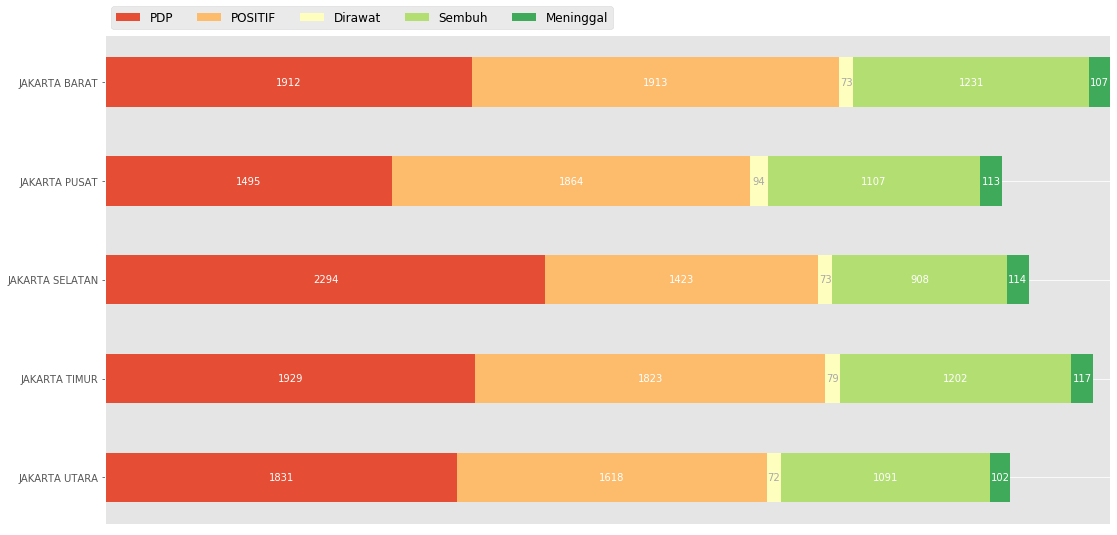

In [69]:
indikator = ['PDP','POSITIF','Dirawat','Sembuh','Meninggal']
provinsi = {
    'JAKARTA BARAT': barat,
    'JAKARTA PUSAT': pusat,
    'JAKARTA SELATAN': selatan,
    'JAKARTA TIMUR': timur,
    'JAKARTA UTARA': utara,
    
}


def survey(provinsi, indikator):
  
    labels = list(provinsi.keys())
    data = np.array(list(provinsi.values()))
    data_cum = data.cumsum(axis=1)
    indikator_colors = plt.get_cmap('RdYlGn')(
        np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(18, 9))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(indikator, indikator_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        ax.barh(labels, widths, left=starts, height=0.5,
                label=colname, color=color)
        xcenters = starts + widths / 2

        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
        for y, (x, c) in enumerate(zip(xcenters, widths)):
            ax.text(x, y, str(int(c)), ha='center', va='center',
                    color=text_color)
    ax.legend(ncol=len(indikator), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='large')

    return fig, ax


survey(provinsi, indikator)
plt.show()

### Task 8 : Visualization presentase ODP dan PDP meninggal

In [70]:
odp = df_total['ODP'].tolist()
pdp = df_total['PDP'].tolist()
positif = df_total['POSITIF'].tolist()
sembuh = df_total['Sembuh'].tolist()
meninggal = df_total['Meninggal'].tolist()

df_total['pres_ODP_meninggal']= df_total['ODP Meninggal'] / df_total['ODP'] * 100 
df_total['pres_PDP_meninggal']= df_total['PDP Meninggal'] / df_total['PDP'] * 100 
df_total['pres_Pos_meninggal']= df_total['Meninggal'] / df_total['POSITIF'] * 100 

df_total

nama_kota  POSITIF      id    ODP  ODP Meninggal   PDP  \
0    JAKARTA BARAT     1913  ID3174  15882             16  1912   
1    JAKARTA PUSAT     1864  ID3173  11882             15  1495   
2  JAKARTA SELATAN     1423  ID3171  15475             16  2294   
3    JAKARTA TIMUR     1823  ID3172  14437             20  1929   
4    JAKARTA UTARA     1618  ID3175  12814              9  1831   

   PDP Meninggal  Dirawat  Sembuh  Meninggal  pres_ODP_meninggal  \
0            121       73    1231        107            0.100743   
1             52       94    1107        113            0.126241   
2             70       73     908        114            0.103393   
3             78       79    1202        117            0.138533   
4             44       72    1091        102            0.070236   

   pres_PDP_meninggal  pres_Pos_meninggal  
0            6.328452            5.593309  
1            3.478261            6.062232  
2            3.051439            8.011244  
3            4.043546            6.417992  
4            2.403058            6.304079

In [71]:
pres_df = df_total.loc[:,["nama_kota","pres_ODP_meninggal",'pres_PDP_meninggal','pres_Pos_meninggal']]
pres_df.style.background_gradient(cmap = "Oranges")

In [72]:
barat_pres = df_total.loc[0,['pres_ODP_meninggal','pres_PDP_meninggal','pres_Pos_meninggal']].tolist()
pusat_pres = df_total.loc[1,['pres_ODP_meninggal','pres_PDP_meninggal','pres_Pos_meninggal']].tolist()
selatan_pres = df_total.loc[2,['pres_ODP_meninggal','pres_PDP_meninggal','pres_Pos_meninggal']].tolist()
timur_pres = df_total.loc[3,['pres_ODP_meninggal','pres_PDP_meninggal','pres_Pos_meninggal']].tolist()
utara_pres = df_total.loc[4,['pres_ODP_meninggal','pres_PDP_meninggal','pres_Pos_meninggal']].tolist()

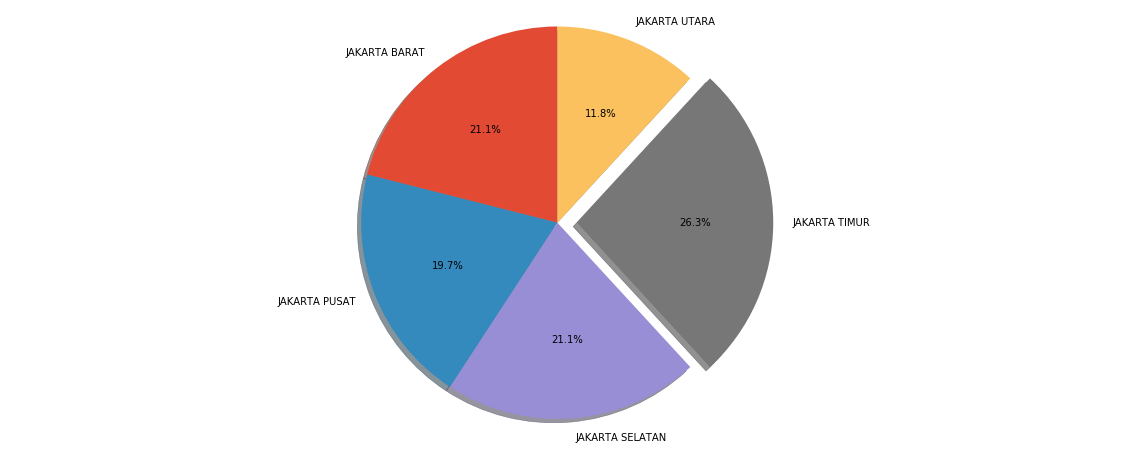

In [73]:
labels = 'JAKARTA BARAT', 'JAKARTA PUSAT', 'JAKARTA SELATAN', 'JAKARTA TIMUR','JAKARTA UTARA'
sizes = [16, 15, 16, 20, 9]
explode = (0, 0, 0, 0.1, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

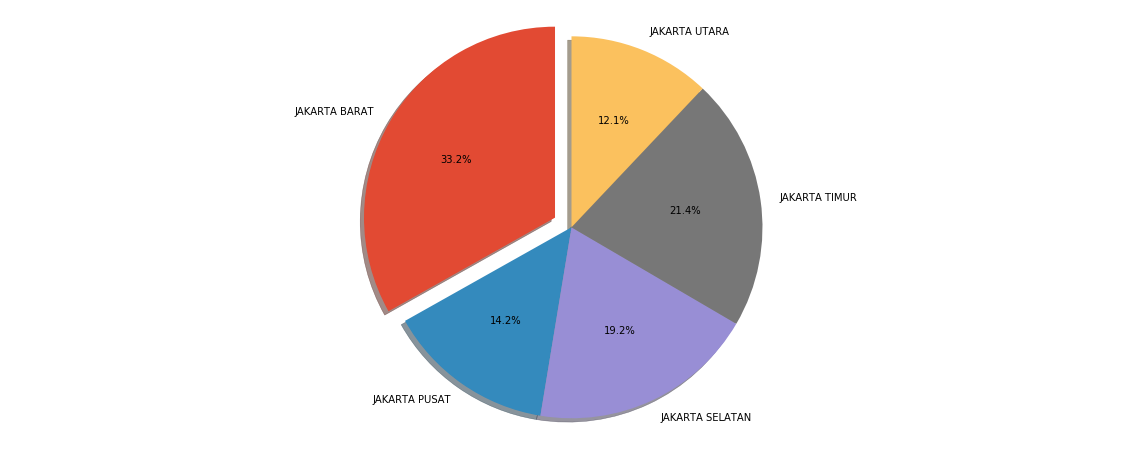

In [74]:
labels = 'JAKARTA BARAT', 'JAKARTA PUSAT', 'JAKARTA SELATAN', 'JAKARTA TIMUR','JAKARTA UTARA'
sizes = [121, 52, 70, 78, 44]
explode = (0.1, 0, 0, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

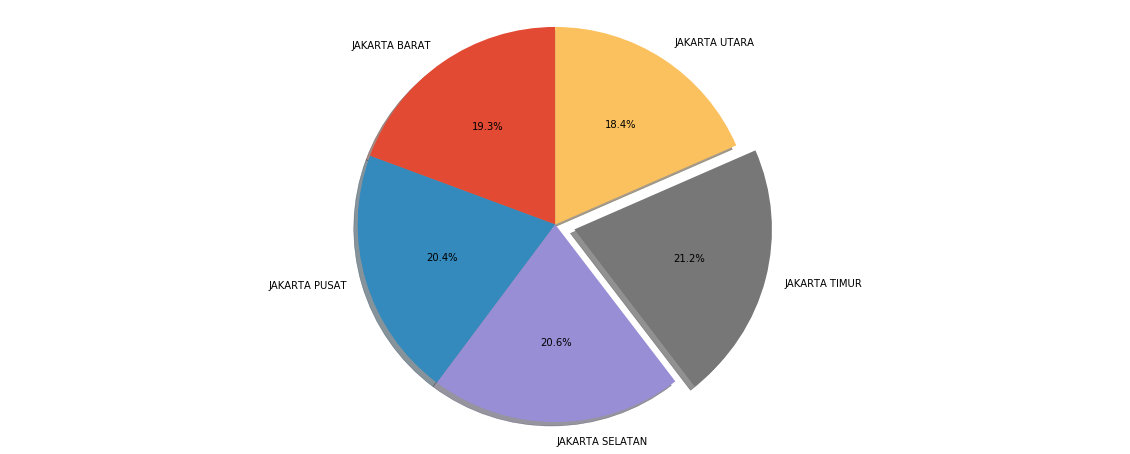

In [75]:
labels = 'JAKARTA BARAT', 'JAKARTA PUSAT', 'JAKARTA SELATAN', 'JAKARTA TIMUR','JAKARTA UTARA'
sizes = [107, 113, 114, 117, 102]
explode = (0, 0, 0, 0.1, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [76]:
df_total.head()

nama_kota  POSITIF      id    ODP  ODP Meninggal   PDP  \
0    JAKARTA BARAT     1913  ID3174  15882             16  1912   
1    JAKARTA PUSAT     1864  ID3173  11882             15  1495   
2  JAKARTA SELATAN     1423  ID3171  15475             16  2294   
3    JAKARTA TIMUR     1823  ID3172  14437             20  1929   
4    JAKARTA UTARA     1618  ID3175  12814              9  1831   

   PDP Meninggal  Dirawat  Sembuh  Meninggal  pres_ODP_meninggal  \
0            121       73    1231        107            0.100743   
1             52       94    1107        113            0.126241   
2             70       73     908        114            0.103393   
3             78       79    1202        117            0.138533   
4             44       72    1091        102            0.070236   

   pres_PDP_meninggal  pres_Pos_meninggal  
0            6.328452            5.593309  
1            3.478261            6.062232  
2            3.051439            8.011244  
3            4.043546            6.417992  
4            2.403058            6.304079